<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n250.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,25.694265,-219.826261,-184.131996,197.726668,-381.858664
1,0.0,1.0,95.236221,-95.073797,10.162425,-49.849859,60.012284
2,0.0,2.0,75.803630,1608.853821,1694.657451,19.332167,1675.325284
3,0.0,3.0,44.000747,-358.876842,-304.876095,132.553709,-437.429804
4,0.0,4.0,71.284041,-227.804598,-146.520557,35.422369,-181.942926
...,...,...,...,...,...,...,...
29995,999.0,25.0,49.694867,-301.226942,-241.532076,-34.056676,-207.475400
29996,999.0,26.0,51.141000,-797.173773,-736.032773,-11.720272,-724.312501
29997,999.0,27.0,66.542115,64.870852,141.412967,226.159254,-84.746286
29998,999.0,28.0,82.894657,-226.938560,-134.043903,478.734134,-612.778037


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,25.694265,-219.826261,-184.131996,197.726668,-381.858664
1,0.0,1.0,95.236221,-95.073797,10.162425,-49.849859,60.012284
2,0.0,2.0,75.803630,1608.853821,1694.657451,19.332167,1675.325284
3,0.0,3.0,44.000747,-358.876842,-304.876095,132.553709,-437.429804
4,0.0,4.0,71.284041,-227.804598,-146.520557,35.422369,-181.942926
...,...,...,...,...,...,...,...
29995,999.0,25.0,49.694867,-301.226942,-241.532076,-34.056676,-207.475400
29996,999.0,26.0,51.141000,-797.173773,-736.032773,-11.720272,-724.312501
29997,999.0,27.0,66.542115,64.870852,141.412967,226.159254,-84.746286
29998,999.0,28.0,82.894657,-226.938560,-134.043903,478.734134,-612.778037


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    25.694265  -219.826261  -184.131996  197.726668  -381.858664
      1.0    95.236221   -95.073797    10.162425  -49.849859    60.012284
      2.0    75.803630  1608.853821  1694.657451   19.332167  1675.325284
      3.0    44.000747  -358.876842  -304.876095  132.553709  -437.429804
      4.0    71.284041  -227.804598  -146.520557   35.422369  -181.942926
...                ...          ...          ...         ...          ...
999.0 25.0   49.694867  -301.226942  -241.532076  -34.056676  -207.475400
      26.0   51.141000  -797.173773  -736.032773  -11.720272  -724.312501
      27.0   66.542115    64.870852   141.412967  226.159254   -84.746286
      28.0   82.894657  -226.938560  -134.043903  478.734134  -612.778037
      29.0   91.456824  -796.501246  -695.044422  610.981975 -1306.026397

[30000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    25.694265  -219.826261  -184.131996  197.726668  -381.858664
      1.0    95.236221   -95.073797    10.162425  -49.849859    60.012284
      2.0    75.803630  1608.853821  1694.657451   19.332167  1675.325284
      3.0    44.000747  -358.876842  -304.876095  132.553709  -437.429804
      4.0    71.284041  -227.804598  -146.520557   35.422369  -181.942926
...                ...          ...          ...         ...          ...
999.0 25.0   49.694867  -301.226942  -241.532076  -34.056676  -207.475400
      26.0   51.141000  -797.173773  -736.032773  -11.720272  -724.312501
      27.0   66.542115    64.870852   141.412967  226.159254   -84.746286
      28.0   82.894657  -226.938560  -134.043903  478.734134  -612.778037
      29.0   91.456824  -796.501246  -695.044422  610.981975 -1306.026397

[30000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,25.694265,-219.826261,-184.131996,197.726668,-381.858664
1,0.0,1.0,95.236221,-95.073797,10.162425,-49.849859,60.012284
2,0.0,2.0,75.803630,1608.853821,1694.657451,19.332167,1675.325284
3,0.0,3.0,44.000747,-358.876842,-304.876095,132.553709,-437.429804
4,0.0,4.0,71.284041,-227.804598,-146.520557,35.422369,-181.942926
...,...,...,...,...,...,...,...
29995,999.0,25.0,49.694867,-301.226942,-241.532076,-34.056676,-207.475400
29996,999.0,26.0,51.141000,-797.173773,-736.032773,-11.720272,-724.312501
29997,999.0,27.0,66.542115,64.870852,141.412967,226.159254,-84.746286
29998,999.0,28.0,82.894657,-226.938560,-134.043903,478.734134,-612.778037


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    25.694265  -219.826261  -184.131996  197.726668  -381.858664
      1.0    95.236221   -95.073797    10.162425  -49.849859    60.012284
      2.0    75.803630  1608.853821  1694.657451   19.332167  1675.325284
      3.0    44.000747  -358.876842  -304.876095  132.553709  -437.429804
      4.0    71.284041  -227.804598  -146.520557   35.422369  -181.942926
...                ...          ...          ...         ...          ...
999.0 25.0   49.694867  -301.226942  -241.532076  -34.056676  -207.475400
      26.0   51.141000  -797.173773  -736.032773  -11.720272  -724.312501
      27.0   66.542115    64.870852   141.412967  226.159254   -84.746286
      28.0   82.894657  -226.938560  -134.043903  478.734134  -612.778037
      29.0   91.456824  -796.501246  -695.044422  610.981975 -1306.026397

[30000 rows x 5 columns]

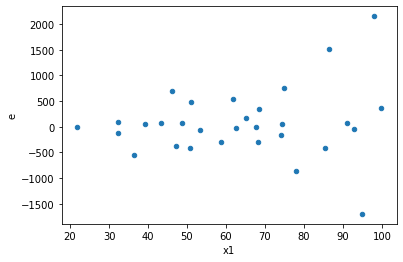

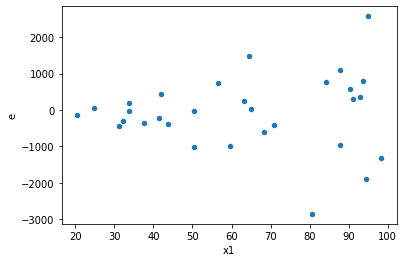

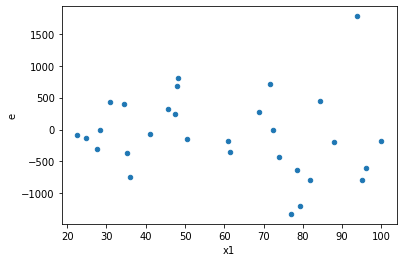

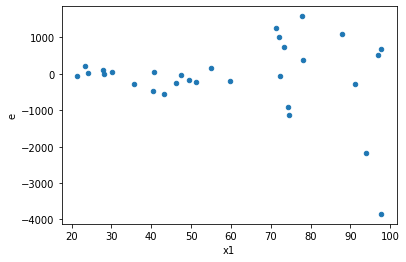

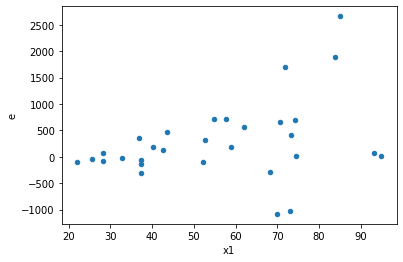

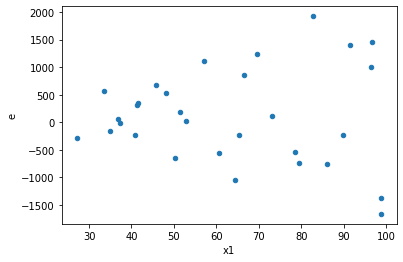

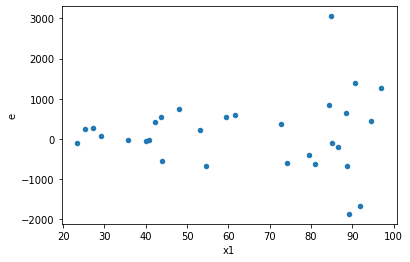

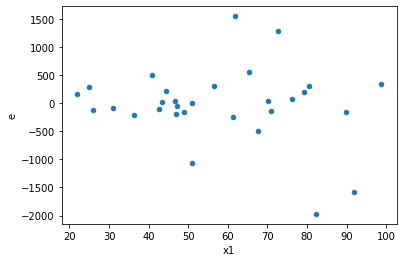

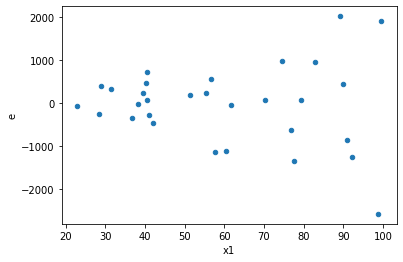

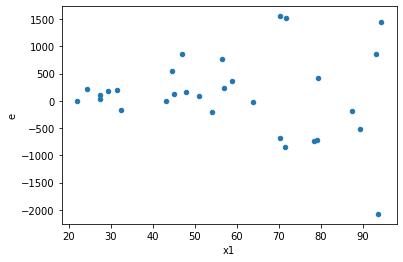

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,11.0,11.0,964089.49553177,15645067.161503427,87644.49959379727,1422278.8328639478,16.22781622869354,6.098855888869714e-05,0.9999695057205557,3.049427944434857e-05,Reject005=0 : Heteroscedasticity
3.0,11.0,11.0,338481.3169947419,28881428.9054327,30771.02881770381,2625584.4459484275,85.32650830438999,1.0343835565862491e-08,0.9999999948280822,5.171917782931246e-09,Reject005=0 : Heteroscedasticity
6.0,11.0,11.0,84407.24642040928,3991820.3397276695,7673.386038219026,362892.7581570609,47.29238908997825,2.437048935988173e-07,0.9999998781475532,1.2185244679940865e-07,Reject005=0 : Heteroscedasticity
7.0,11.0,11.0,1184586.899820309,8352792.987549446,107689.71816548263,759344.8170499495,7.051228566529385,0.0030523367841435167,0.9984738316079282,0.0015261683920717584,Reject005=0 : Heteroscedasticity
9.0,11.0,11.0,1864176.403113431,25427982.192899626,169470.582101221,2311634.744809057,13.640330470030305,0.00014326958285670877,0.9999283652085716,7.163479142835438e-05,Reject005=0 : Heteroscedasticity
10.0,11.0,11.0,1339710.0904720174,11108248.875474658,121791.82640654704,1009840.8068613325,8.291531842953358,0.0014875605262216762,0.9992562197368892,0.0007437802631108381,Reject005=0 : Heteroscedasticity
11.0,11.0,11.0,1372530.382865068,22933608.00381815,124775.48935136982,2084873.4548925592,16.708998423733057,5.274435527025112e-05,0.9999736278223649,2.637217763512556e-05,Reject005=0 : Heteroscedasticity
14.0,11.0,11.0,422038.3248089431,13271664.212763742,38367.12043717664,1206514.9284330674,31.4465853753254,2.0878777853283736e-06,0.9999989560611073,1.0439388926641868e-06,Reject005=0 : Heteroscedasticity
15.0,11.0,11.0,1701026.8311860594,15524564.674404548,154638.8028350963,1411324.0613095043,9.126584242989205,0.0009612635907016998,0.9995193682046492,0.0004806317953508499,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,11.0,31033864.05599308,3579290.2081694873,2821260.3687266437,325390.0189244989,0.11533498380064842,0.001215055699472685,Reject005=0 : Heteroscedasticity
1.0,11.0,11.0,12437385.174651781,1847067.458374541,1130671.3795137983,167915.22348859464,0.14850930741768675,0.0037276986785234685,Reject005=0 : Heteroscedasticity
2.0,11.0,11.0,964089.49553177,15645067.161503427,87644.49959379727,1422278.8328639478,16.22781622869354,6.098855888869714e-05,Reject005=0 : Heteroscedasticity
3.0,11.0,11.0,338481.3169947419,28881428.9054327,30771.02881770381,2625584.4459484275,85.32650830438999,1.0343835565862491e-08,Reject005=0 : Heteroscedasticity
4.0,11.0,11.0,5591202.2873925315,1977169.5400279535,508291.1170356847,179742.68545708669,0.353621535834292,0.09889648175958049,Reject005=1 : Homoscedasticity
5.0,11.0,11.0,13056682.529787285,734302.4484077004,1186971.1390715714,66754.76803706367,0.05623958817505715,3.866754569527033e-05,Reject005=0 : Heteroscedasticity
6.0,11.0,11.0,84407.24642040928,3991820.3397276695,7673.386038219026,362892.7581570609,47.29238908997825,2.437048935988173e-07,Reject005=0 : Heteroscedasticity
7.0,11.0,11.0,1184586.899820309,8352792.987549446,107689.71816548263,759344.8170499495,7.051228566529385,0.0030523367841435167,Reject005=0 : Heteroscedasticity
8.0,11.0,11.0,12998854.937463123,1129206.7451692142,1181714.0852239204,102655.15865174675,0.08686970895527141,0.00032441793260562507,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    940
Reject005=1 : Homoscedasticity       60
Name: Result_test, dtype: int64